<a href="https://colab.research.google.com/github/adolfoguimaraes/datascience/blob/main/code/02_laboratorio_transformacao_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório de Transformação dos Dados

O objetivo deste laboratório é aplicar na base do titanic as etapas de prepação de dados apresentadas em sala de aula. Ao final apresente uma base de dados adequada para um modelo de classificação. 

Algumas tarefas de preparação de dados são implementadas no pandas. Se necessário, investigue a [documentação](https://pandas.pydata.org/) para usar os métodos. 

In [27]:
# Imports necessário

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn import preprocessing



## Dataset

Vamos trabalhar novamente com a base do Titanic. A bose pode ser baixada na página do desafio do Titanic no Kaggle: https://www.kaggle.com/c/titanic. O arquivo também está disponível na pasta `datasets` deste repositório. 

![](https://media.giphy.com/media/XOY5y7YXjTD7q/giphy.gif?cid=ecf05e47kfxmcx3vp300zcgdbteywwruog1dvtie391tk8mw&rid=giphy.gif&ct=g)



In [28]:
titanic_dataset = pd.read_csv("../datasets/TitanicDataset.csv")
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Descrição das Tarefas

1. Eliminar os atributos manualmente
2. Verificar se os dados estão desbalanceados
3. Analisar dados ausentes
4. Verificar dados incosistentes, redundantes e com ruído.
5. Fazer as transformações dos dados, se necessário.

## Execução das Tarefas



### Eliminar os atributos manualmente

A primeira coisa que pode ser feita é a eliminação de atributos manualmente. De cara, atributos como _PassengerId_, _Name_ e _Ticket_ não trazem informações relevantes para o processo de classificação. Desta forma podemos remove-los. Vamos utilizar o método `drop` do pandas.

In [29]:
# Eliminando as colunas 
titanic_dataset = titanic_dataset.drop(columns=['PassengerId',"Name", "Ticket"])
titanic_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### Verificar se os dados estão desbalanceados

Removido os atributos podemos verificar a distribuição de classes para saber se os dados estão desbalanceados.

<AxesSubplot:>

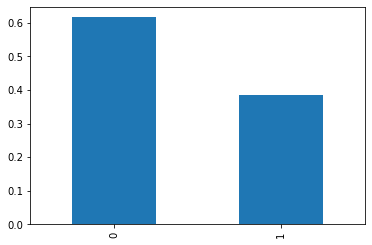

In [30]:
titanic_dataset['Survived'].value_counts(normalize=True).plot(kind='bar')

A proporção é de mais ou menos de 60% para a classe não sobreviveu e 40% para sobreviveu. A análise que devemos fazer é se essa diferença vai ter influência na tarefa de classificação. A gente vai trabalhar mais esse conceito quando começarmos a trabalhar com os modelos de machine learning.


### Analisar dados ausentes

Uma outra análise que se pode fazer é em relação aos dados incompletos. Para isto, vamos usar a função `count` para indicar quantos dados tem cada atributo.

In [31]:
count_ = titanic_dataset.count()
count_

Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Cabin       204
Embarked    889
dtype: int64

Com o gráfico de barras, podemos ver a diferença de alguns atributos. O atributo _Cabin_ e _Age_ estão abaixo dos demais. O caso mais visível é o atributo _Cabin_.

<AxesSubplot:>

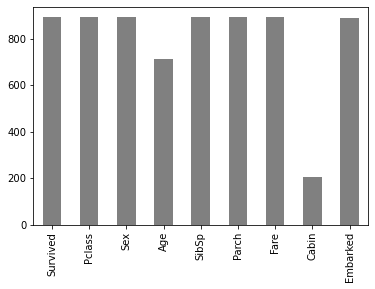

In [32]:
count_.plot(kind='bar',color='grey')

**O que podemos fazer com cada um dos atributos?**

`Cabin`: nesse caso podemos remover o atributo _Cabin_ que refere-se a cabine em que o passageiro estava. Talvez se conseguíssemos relacionar a cabine com a posição dentro do navio, poderíamos ter algum tipo de informação (mas a base não tem nenhuma informação que permita esse tipo de análise). Mas dada a quantidade de dados válidos e a não relevância do atributo, podemos excluí-lo. 

`Age`: Remover este atributo é mais complicado. A idade é uma informação relevante para o processo de classificação. Remover os dados faria com que eliminássemos quase 200 instâncias, aproximadamente 20% da base. Nesse caso a gente deve pensar em outra abordagem. 

A documentação do pandas possui [um artigo](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html) falando somente sobre dados ausentes. É possível identificar e aplicar algumas métricas de substituição de valores.  Vamos usar o método de substituir os valores ausentes pela média da coluna. Essa é uma abordagem muito simples. Poderíamos utilizar algo mais elaborado. Fica como exercício a parte. 

In [33]:
# Removendo a columa Cabin

titanic_dataset = titanic_dataset.drop(columns=['Cabin'])
titanic_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [34]:
# Substituindo os valores ausentes pela média da coluna 

titanic_dataset['Age'] = titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean())
titanic_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:>

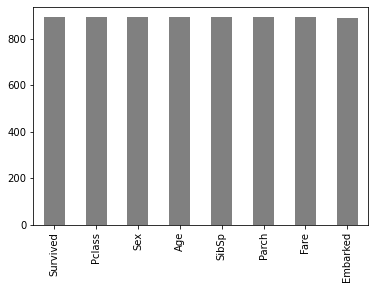

In [35]:
# Imprimindo novamente o gráfico 
count_ = titanic_dataset.count()
count_.plot(kind='bar',color='grey')

### Verificar dados incosistentes, redundantes e com ruído.

O passo seguinte é fazer a análise em cima de dados incosistentes, ruídos e redundantes. 

O pandas já possui um método que permite eliminar dados duplicados. No entanto, se aplicarmos ele a esta base, pode ser que muitos dados iguais mas não necessariamente é um problema de duplicidade. Como removemos todos os dados que de alguma forma identificava o passageiro, a duplicidade pode ser de fato por conta de um padrão que é comum na base. Sendo assim, vamos carregar temporariamente a base original e fazer a verificação de duplicidade nesta.



In [36]:
dataframe_temp = pd.read_csv("../datasets/TitanicDataset.csv")
duplicated_rows = dataframe_temp[dataframe_temp.duplicated(keep='last')]
duplicated_rows.shape

(0, 12)

Observe que os dados originais não possuem instâncias duplicadas. 

A base pode apresentar redudância de atributos a nível de atributos. Pelo contexto do atributos, não foram identificadas redudâncias. 

Podemos olhar a partir da correlação dos atributos, usando a matriz de correlação extraída no último laboratório, temos:

<AxesSubplot:>

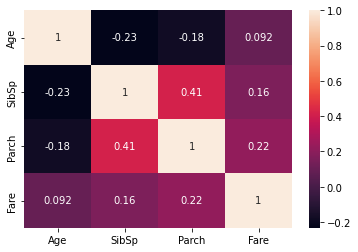

In [37]:
titanic_corr = titanic_dataset[['Age','SibSp','Parch', 'Fare']].corr()
sns.heatmap(titanic_corr, xticklabels=titanic_corr.columns, yticklabels=titanic_corr.columns, annot=True)

Nenhum atributo numérico tem uma correlação muito forte. Sendo assim, não vamos remover nenhum atributo. 

Em relação a dados inconsistentes e ruídos, podemos analisar brevemente o boxplot dos atributos. Se analisarmos estes gráficos, podemos ver alguns outliers, principalmente nos atributos _Age_ e _Fare_.

<AxesSubplot:xlabel='Age'>

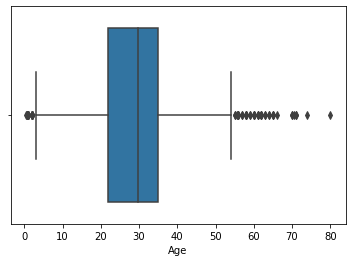

In [38]:
sns.boxplot(x=titanic_dataset['Age'])

<AxesSubplot:xlabel='Fare'>

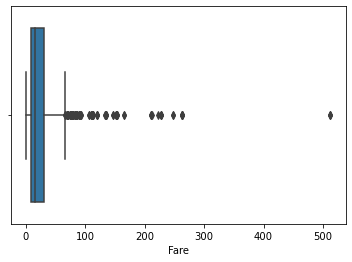

In [39]:
sns.boxplot(x=titanic_dataset['Fare'])

Podemos listar os valores que foram considerados outliers a partir do método _boxplot_stats_ do _matplotlib_. Vamos dar uma olhada nos valores de outliers dos dois casos. 

In [40]:
outliers_age = [y for stat in boxplot_stats(titanic_dataset['Age']) for y in stat['fliers']]
print("%i valores como outliers de Age: %s" % (len(outliers_age), outliers_age))

66 valores como outliers de Age: [2.0, 2.0, 0.83, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 0.92, 2.0, 1.0, 1.0, 0.75, 2.0, 2.0, 2.0, 0.75, 0.67, 1.0, 0.42, 2.0, 1.0, 0.83, 58.0, 55.0, 66.0, 65.0, 59.0, 71.0, 70.5, 55.5, 61.0, 56.0, 58.0, 59.0, 62.0, 58.0, 63.0, 65.0, 61.0, 60.0, 64.0, 65.0, 56.0, 63.0, 58.0, 55.0, 71.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 57.0, 62.0, 74.0, 56.0]


In [41]:
outliers_fare = [y for stat in boxplot_stats(titanic_dataset['Fare']) for y in stat['fliers']]
print("%i valores como outliers de Fare: %s" % (len(outliers_fare), outliers_fare))

116 valores como outliers de Fare: [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


Uma ação que podemos tomar com esses valores é sua remoção da base de dados. No entanto, vamos deixar para fazer isso quando estivermos trabalhando com os modelos de Machine Learnig. Só assim saberemos se a retirada dessas instâncias implicará em algum projuízo para o processo de aprendizagem. 

### Fazer as transformações dos dados, se necessário.

Para finalizar essa primeira parte de Preparação dos Dados, precisamos fazer as transformações de dados necessárias. Como vimos no guia de estudo, podemos transformar dados numéricos em categóricos ou vice-versa. Além disso, podemos trabalhar com a escala e o intervalo dos dados. 

Vamos analisar a base de dados resultante dos processo anteriores. 

In [42]:
titanic_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Quais alterações podemos fazer nos dados?**

* Os campos _Sex_ e _Embarked_ são categóricos e podems ser transformados em dados numéricos. No entanto, nenhum dos dois tem relação de ordem, logo devemos criar atributos novos para representar essa informação;
* O Campo _PClass_ também é um campo categórico. No entanto, não vamos precisar fazer a transformação anterior porque existe uma relação de ordem em sua informação;
* A escala do campo _Fare_ é muito grande se comparada com os demais dados. Logo, podemos normalizar os valores para reduzir essa diferença;
* O atributo _Survived_ é categórico mas ele será nossa atributo alvo. Vamos manter dessa forma para que seja utilizado de forma adequado nos modelos de classificação. 
* O campo _Age_ pode ser discretizado e transformado em um atributo qualitativo. Lembre-se que algoritmos de classificação trabalham melhor com esse tipo de atributo. 

Vamos usar o pandas para aplicar essas transformações nos dados. 

_Transformando os campos `Sex` e `Embarked`_


Para isso vamos utilizar a função *get_dummie* do pandas. Essa função pega os valores categóricos e transformam em colunas. 

In [43]:
titanic_dataset = pd.get_dummies(titanic_dataset, columns=["Sex","Embarked"])

In [44]:
titanic_dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


Um bom guia sobre transformação de atributos categóricos com pandas pode ser encontrado [neste link](https://pbpython.com/categorical-encoding.html)

_Normalizando o campo `Fare`_ 


Vamos utilizar o pacote _preprocessing_ do scikit-learn para essa tarefa. 

In [45]:
# O primeiro passo é converter a coluna que será normalizada para float. 
# Para verificar os tipos das colunas use: titanic_dataset.dtypes 

float_array = titanic_dataset['Fare'].values

In [46]:
# O segundo passo é criar o objeto min/max do preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array[:, np.newaxis])

In [47]:
# O terceiro passo é substituir os valores na base

titanic_dataset['Fare'] = scaled_array

In [48]:
titanic_dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0.014151,0,1,0,0,1
1,1,1,38.0,1,0,0.139136,1,0,1,0,0
2,1,3,26.0,0,0,0.015469,1,0,0,0,1
3,1,1,35.0,1,0,0.103644,1,0,0,0,1
4,0,3,35.0,0,0,0.015713,0,1,0,0,1


_Convertendo `idade` em qualitativo_

O passo seguinte é transformar o campo quantitativo de idade em qualitativo. Um dos métodos que permite fazer isso é _cut_ do pandas. Detalhes deste método pode ser encontrado [neste link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html). 

Vamos usar a seguinte classificação de idades: Criança (0-12 anos), adolescente (13-18 anos), adulto (19-59 anos) and idoso (acima de 60 anos).

Estou usando os parâmetros _bins_, _labels_ e _right_ do método _cut_. O primeiro diz o intervalo em que a discretização será feita. O segundo indica o label associado a cada intervalo e o terceiro indica que o lado direito vai ser aberto e o esquerdo fechado. Sendo assim, temos os seguintes intervalos: 

* **[0, 13)**  $0 \leq x < 13$ **(criança)**
* **[13, 19):** $13 \leq x < 19$ **(adolescente)**
* **[19, 60):** $ 19 \leq x < 60$ **(adulto)**
* **[60, infinito):** $ x \geq 60$ **(idoso)**


In [49]:
titanic_dataset['Age'] = pd.cut(titanic_dataset['Age'],bins=[0,13,19,60,float("inf")],right=False,labels=['criança','adolescente','adulto','idoso'])
titanic_dataset.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,adulto,1,0,0.014151,0,1,0,0,1
1,1,1,adulto,1,0,0.139136,1,0,1,0,0
2,1,3,adulto,0,0,0.015469,1,0,0,0,1
3,1,1,adulto,1,0,0.103644,1,0,0,0,1
4,0,3,adulto,0,0,0.015713,0,1,0,0,1
5,0,3,adulto,0,0,0.016510,0,1,0,1,0
6,0,1,adulto,0,0,0.101229,0,1,0,0,1
7,0,3,criança,3,1,0.041136,0,1,0,0,1
8,1,3,adulto,0,2,0.021731,1,0,0,0,1
9,1,2,adolescente,1,0,0.058694,1,0,1,0,0


Como transformamos a coluna **Age** em qualitativo, devemos transformar agora em valores. Como não existe um grau de importância entre as idades, vamos utilizar o método _dummie_ usado anteriormente. 

In [50]:
titanic_dataset = pd.get_dummies(titanic_dataset, columns=["Age"])
titanic_dataset.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_criança,Age_adolescente,Age_adulto,Age_idoso
0,0,3,1,0,0.014151,0,1,0,0,1,0,0,1,0
1,1,1,1,0,0.139136,1,0,1,0,0,0,0,1,0
2,1,3,0,0,0.015469,1,0,0,0,1,0,0,1,0
3,1,1,1,0,0.103644,1,0,0,0,1,0,0,1,0
4,0,3,0,0,0.015713,0,1,0,0,1,0,0,1,0


## Transformando os dados da base de `Popularidade de Notícias`

In [52]:
data_popularity = pd.read_csv("../datasets/OnlineNewsPopularity.csv")
data_popularity.columns = [column.strip() for column in data_popularity.columns] # corrige o problema de ter espaço nos nomes das colunas 
data_popularity = transform_data(data_popularity)
data_popularity.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,channel,weekday,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,731.0,8.0,960.0,0.418163,21.0,20.0,20.0,0.0,10.0,lifestyle,monday,0.514480,0.268303,0.080208,0.016667,0.000000,0.000000,556
1,731.0,10.0,187.0,0.666667,7.0,0.0,1.0,0.0,7.0,lifestyle,monday,0.477165,0.150000,0.026738,0.010695,0.000000,0.000000,1900
2,731.0,11.0,103.0,0.689320,3.0,1.0,1.0,0.0,6.0,lifestyle,monday,0.423611,0.118056,0.029126,0.009709,0.857143,-0.714286,5700
3,731.0,10.0,243.0,0.619247,1.0,1.0,0.0,0.0,10.0,lifestyle,monday,0.517984,0.155603,0.049383,0.020576,0.000000,0.000000,462
4,731.0,8.0,204.0,0.586207,7.0,2.0,1.0,0.0,8.0,lifestyle,monday,0.651940,0.316986,0.073529,0.004902,0.000000,0.000000,3600


Identifique na base acima quais atributos devem ser transformados e aplique os métodos de transformação.

## É isso

Com isso finalizamos nosso laboratório de hoje, mas ainda precisamos analisar a redução de dimensionalidade. Isso vai ser abordado no próximo laboratório.

![force](https://media.giphy.com/media/3o85xAojNshmzlySyc/giphy.gif?cid=ecf05e47x07q84ywa19aus9n1j1owve0mad420ffmpo6vjha&rid=giphy.gif&ct=g)

**Boa atividade e Divirtam-se ;)**

In [51]:
def transform_data(dataset):

    # Colunas com informações de Channel 

    melt_columns_channel = [
        'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed',
        'data_channel_is_tech', 'data_channel_is_world'
    ]

    # Demais colunas do dataset

    all_columns_channel = [column for column in dataset.columns if column not in melt_columns_channel]

    # Transformação da base de dados 

    data_final = pd.melt(dataset, id_vars=all_columns_channel, value_vars=melt_columns_channel, var_name='channel', value_name='channel_value')
    data_final = data_final[data_final['channel_value'] != 0]
    data_final['channel'] =data_final['channel'].str.split("_").str[-1]
    data_final.drop(columns=['channel_value'], inplace=True)
    data_final.reset_index(inplace=True)
    
    
    # Colunas com informações do weekday 
    melt_columns_weekday = ['weekday_is_monday', 'weekday_is_tuesday', 
        'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday'
    ]

    # Demais colunas do dataset
    all_columns_weekday = [column for column in data_final.columns if column not in melt_columns_weekday]


    data_final = pd.melt(data_final, id_vars=all_columns_weekday, value_vars=melt_columns_weekday, var_name='weekday', value_name='weekday_value')
    data_final = data_final[data_final['weekday_value'] != 0]
    data_final['weekday'] =data_final['weekday'].str.split("_").str[-1]
    data_final.drop(columns=['weekday_value'], inplace=True)
    data_final.reset_index(inplace=True)

    # Selecionando colunas de interesse 

    data_final = data_final[['timedelta', 'n_tokens_title',
       'n_tokens_content', 'n_unique_tokens','num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'num_keywords', 'channel', 'weekday', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares']]
    

    return data_final



